# AirBnB Istanbul Data Analysis and Prediction

## Loading File

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

In [16]:
airbnb = pd.read_csv("AirbnbIstanbul.csv")
df=airbnb.copy()

## Data Exploration

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356


In [18]:
df.shape

(16251, 16)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16251.0,1.885640e+07,1.054805e+07,4826.00000,8.500978e+06,2.161975e+07,2.870219e+07,3.245756e+07
host_id,16251.0,8.888706e+07,8.162114e+07,6603.00000,1.788230e+07,5.210740e+07,1.681345e+08,2.437341e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,16251.0,4.102646e+01,4.319838e-02,40.81469,4.100436e+01,4.103135e+01,4.104781e+01,4.141442e+01
longitude,16251.0,2.898539e+01,1.143578e-01,28.03200,2.897413e+01,2.898426e+01,2.902245e+01,2.990778e+01
price,16251.0,3.547239e+02,1.428938e+03,0.00000,1.050000e+02,1.900000e+02,3.270000e+02,5.956100e+04
minimum_nights,16251.0,4.692942e+00,2.891610e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.125000e+03
number_of_reviews,16251.0,7.186758e+00,2.143962e+01,0.00000,0.000000e+00,0.000000e+00,4.000000e+00,3.070000e+02
reviews_per_month,7767.0,9.147663e-01,1.086907e+00,0.01000,1.800000e-01,5.200000e-01,1.190000e+00,1.200000e+01
calculated_host_listings_count,16251.0,4.103809e+00,7.648227e+00,1.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.700000e+01


In [20]:
df.isnull().sum()

id                                    0
name                                 91
host_id                               0
host_name                             7
neighbourhood_group               16251
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8484
reviews_per_month                  8484
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
df.drop(['neighbourhood_group'],axis=1,inplace=True)

In [22]:
df.last_review.fillna("No Review",inplace=True) 
df.reviews_per_month.fillna(0,inplace=True)
df.host_name.fillna('No Host Name',inplace = True)
df.name.fillna("Not States",inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16251 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16251 non-null  object 
 4   neighbourhood                   16251 non-null  object 
 5   latitude                        16251 non-null  float64
 6   longitude                       16251 non-null  float64
 7   room_type                       16251 non-null  object 
 8   price                           16251 non-null  int64  
 9   minimum_nights                  16251 non-null  int64  
 10  number_of_reviews               16251 non-null  int64  
 11  last_review                     16251 non-null  object 
 12  reviews_per_month               

In [24]:
df.neighbourhood.unique()

array(['Uskudar', 'Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 'Beykoz',
       'Atasehir', 'Fatih', 'Adalar', 'Kadikoy', 'Kagithane', 'Maltepe',
       'Bakirkoy', 'Esenyurt', 'Basaksehir', 'Kartal', 'Gaziosmanpasa',
       'Bahcelievler', 'Bagcilar', 'Buyukcekmece', 'Silivri',
       'Beylikduzu', 'Umraniye', 'Sile', 'Cekmekoy', 'Sancaktepe',
       'Tuzla', 'Pendik', 'Sultangazi', 'Eyup', 'Zeytinburnu',
       'Kucukcekmece', 'Avcilar', 'Gungoren', 'Catalca', 'Bayrampasa',
       'Esenler', 'Sultanbeyli', 'Arnavutkoy'], dtype=object)

## Data Visualization


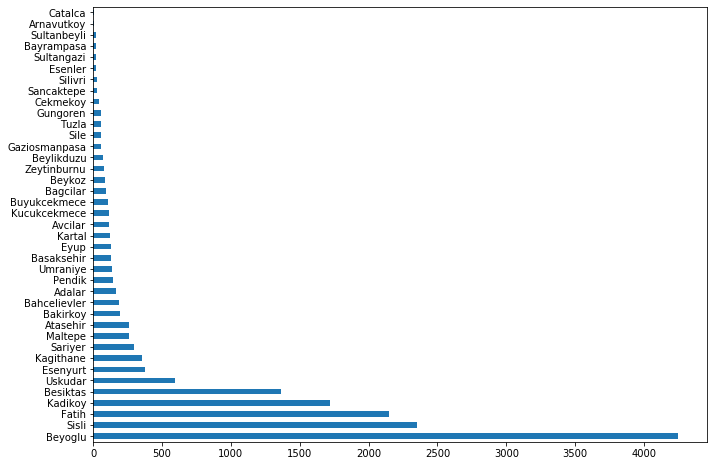

In [25]:
## Which neighborhood has the most AirBnB?
df.neighbourhood.value_counts().sort_values(ascending=False).plot(kind="barh",figsize=(11,8));

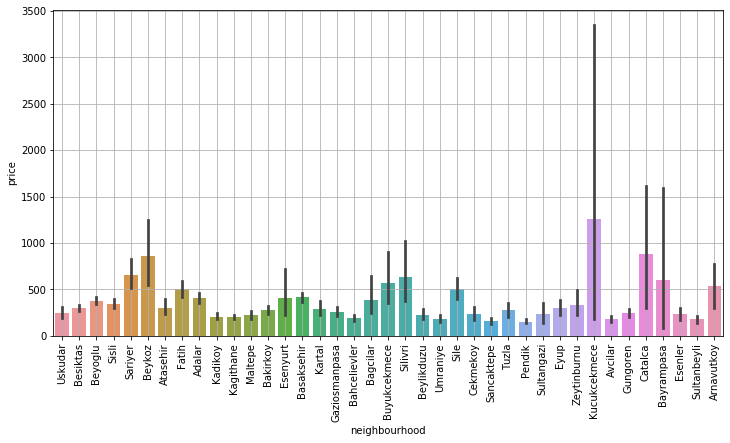

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x="neighbourhood",y="price",data=df)
plt.xticks(rotation=90)
plt.grid();

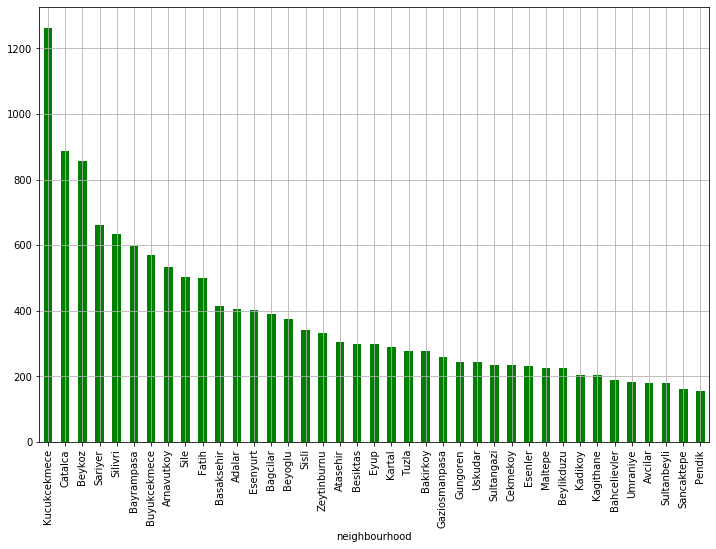

In [27]:
plt.figure(figsize=(12,8))
df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).plot(kind="bar",color="green",grid=True);

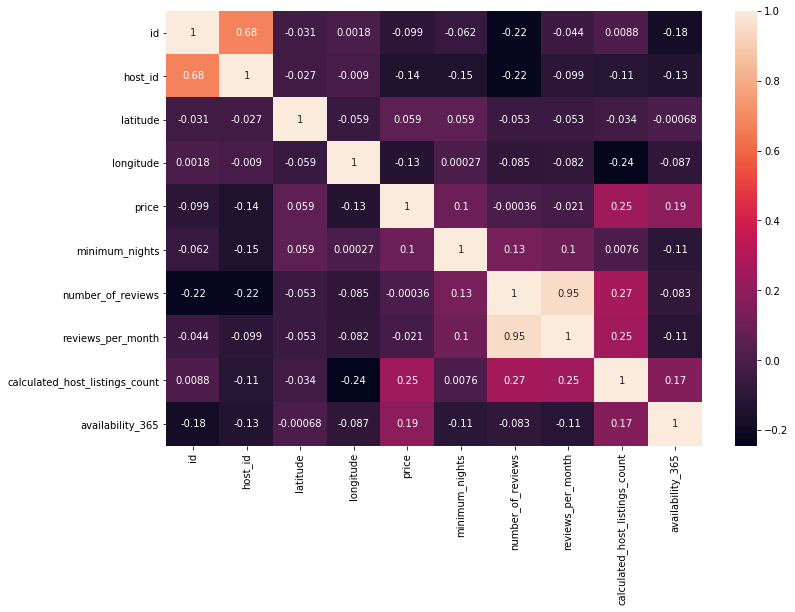

In [28]:
corr = df.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True);

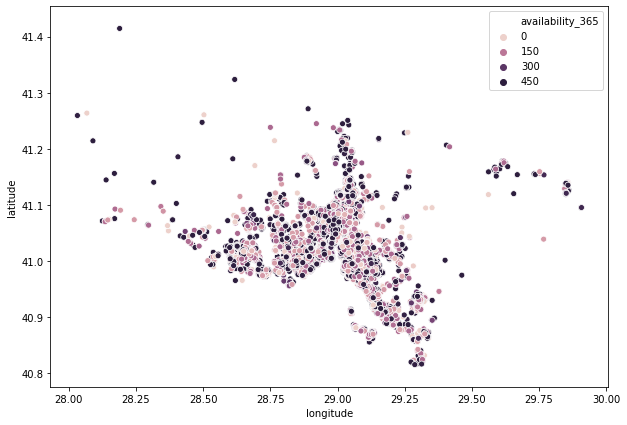

In [29]:
plt.figure(figsize=(10,7)) 
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365) 
plt.ioff()

## Simple Linear Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder = LabelEncoder()
df["neighbourhood"]=labelencoder.fit_transform(df["neighbourhood"])
df['room_type'] = labelencoder.fit_transform(df['room_type'])

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,37,41.05650,29.05367,0,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,9,41.06984,29.04545,0,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,9,41.07731,29.03891,0,211,21,0,No Review,0.00,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,12,41.03220,28.98216,0,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,32,41.04471,28.98567,0,591,3,0,No Review,0.00,13,356


In [33]:
df_price=df[df.price<1000]
df_price.shape

(15638, 15)

In [34]:
df_predictors=df_price[["neighbourhood","latitude","longitude",'room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
df_predictors.head(10)

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,37,41.05650,29.05367,0,1,1,0.01,1,365
1,9,41.06984,29.04545,0,30,41,0.38,2,49
2,9,41.07731,29.03891,0,21,0,0.00,1,83
3,12,41.03220,28.98216,0,5,2,0.04,1,228
4,32,41.04471,28.98567,0,3,0,0.00,13,356
5,12,41.03105,28.98297,0,1,0,0.00,1,365
6,29,41.09048,29.05559,0,3,0,0.00,1,365
7,12,41.04844,28.95254,1,3,0,0.00,1,365
8,12,41.03350,28.97626,1,1,1,0.01,1,365
9,32,41.05382,28.99739,1,2,1,0.02,2,232


In [35]:
x = df_predictors
y = df_price["price"]
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2,random_state=353)

In [36]:
lin_model = LinearRegression().fit(x_train,y_train)

In [37]:
y_pred = lin_model.predict(x_test)

In [38]:
r2_score(y_test,y_pred)

0.20292080910339128